# Misael Morales
## Reservoir Inversion via Deep Learning
***

In [2]:
# Load base packages
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import pyvista as pv

# Load my project packages
from utils_3d import *

# restart keras
keras.backend.clear_session()

In [3]:
# Check tensorflow GPU settings
check_tensorflow_gpu()

Tensorflow built with CUDA? True
Tensorflow version: 2.10.0
# GPU available: 1
CUDA: 64_112 | cuDNN: 64_8
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


***

***

***

In [40]:
n_realizations = 318
satu = np.zeros((318,40,48,48,8))
pres = np.zeros((318,40,48,48,8))
poro = np.zeros((318,48,48,8))
perm = np.zeros((318,48,48,8))
prod = np.zeros((318,40,9,4))

for i in range(n_realizations):
    k = i+1
    satu[i] = np.moveaxis(loadmat('simulations 3D/data/saturation/saturation_{}.mat'.format(k))['satu'].reshape(40,8,48,48).T, -1, 0)
    pres[i] = np.moveaxis(loadmat('simulations 3D/data/pressure/pressure_{}.mat'.format(k))['pres'].reshape(40,8,48,48).T, -1, 0)/10
    poro[i] = loadmat('simulations 3D/data/porosity/porosity_{}.mat'.format(k))['porosity'].reshape(8,48,48).T
    perm[i] = loadmat('simulations 3D/data/permeability/permeability_{}.mat'.format(k))['perm_md'].reshape(8,48,48).T
    prod[i] = loadmat('simulations 3D/data/production/production_{}'.format(k))['production']
prod[:,:,:,0] /= 75
facies = np.load('simulations 3D/facies_maps_48_48_8.npy')
timestamps = loadmat('simulations 3D/data/timestamp_yr.mat')['timestamps_yr'].squeeze()

print('Pres: {} | Satu: {} | Poro: {} | Perm: {} | Facies: {}'.format(pres.shape, satu.shape, poro.shape, perm.shape, facies.shape))
print('Timestamps: {} | Production: {}'.format(timestamps.shape, prod.shape))

Pres: (318, 40, 48, 48, 8) | Satu: (318, 40, 48, 48, 8) | Poro: (318, 48, 48, 8) | Perm: (318, 48, 48, 8) | Facies: (318, 48, 48, 8)
Timestamps: (40,) | Production: (318, 40, 9, 4)


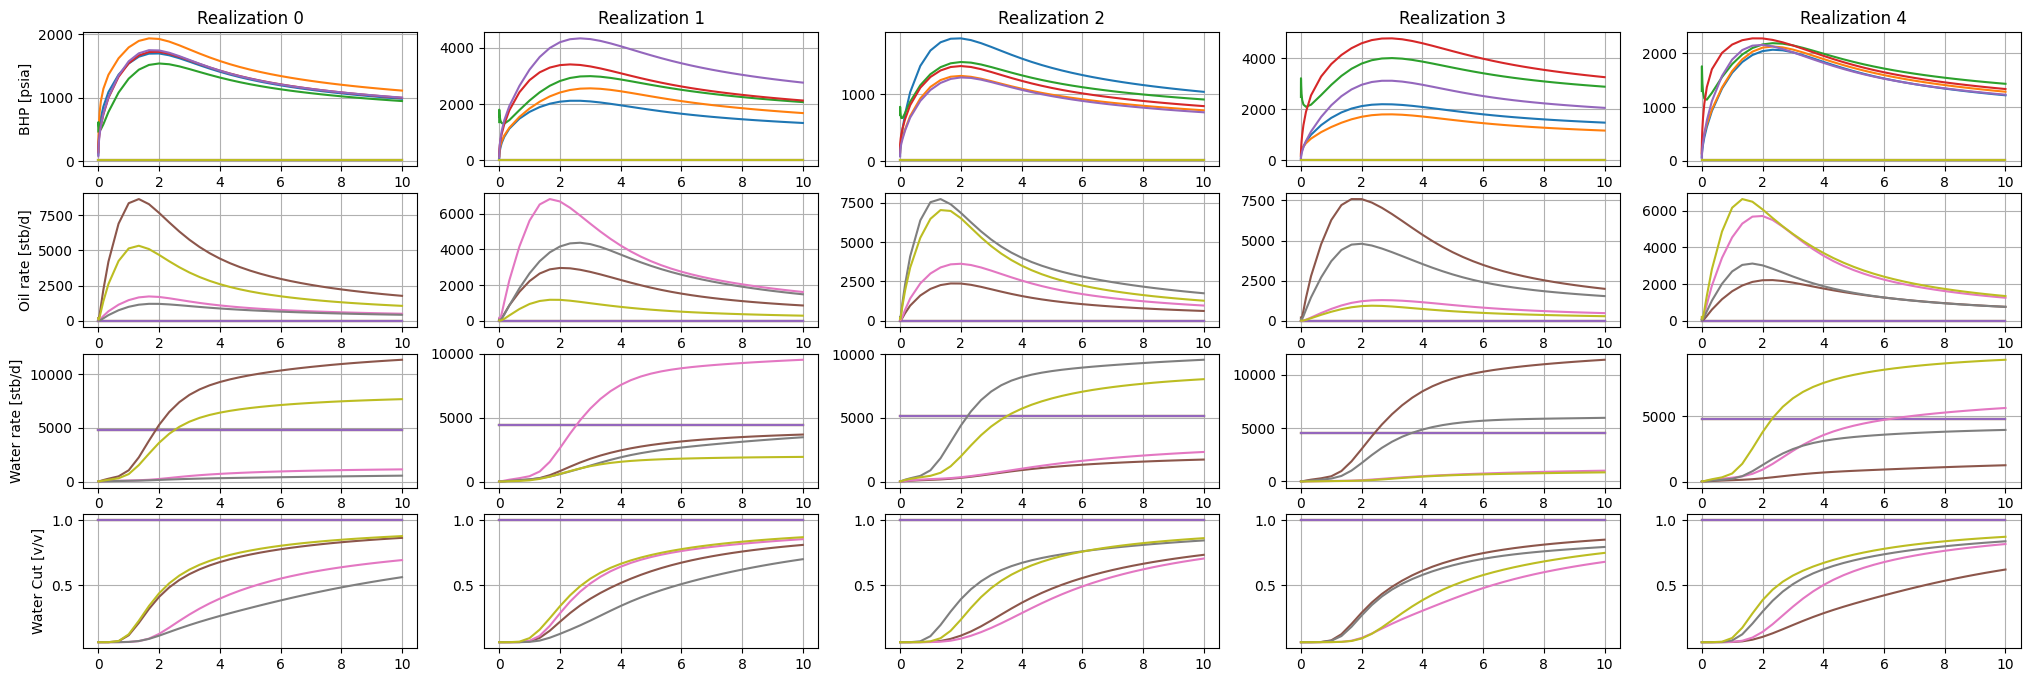

In [43]:
labels = ['BHP [psia]', 'Oil rate [stb/d]', 'Water rate [stb/d]', 'Water Cut [v/v]']
ncols = 5
fig, axs = plt.subplots(4, ncols, figsize=(25,8))
for i in range(4):
    for j in range(ncols):
        axs[i,j].plot(timestamps, prod[j,:,:,i])
        axs[0,j].set(title='Realization {}'.format(j))
        axs[i,j].grid('on')
    axs[i,0].set(ylabel=labels[i])
plt.show()

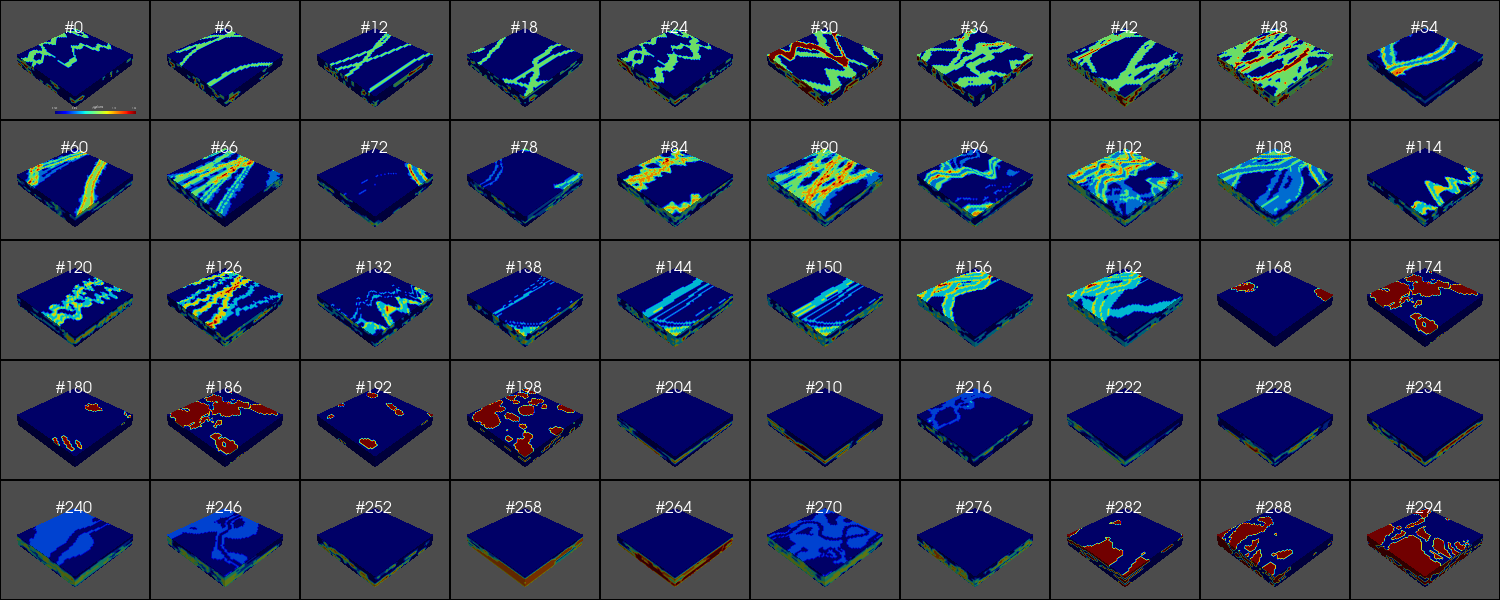

In [102]:
k=0
p = pv.Plotter(shape=(5, 10))
for i in range(5):
    for j in range(10):
        p.subplot(i,j)
        p.add_mesh(np.flip(facies[k]), cmap='jet')
        p.add_title('#{}'.format(k), font_size=8)
        k += 6
p.show(jupyter_backend='static', window_size=(1500,600))

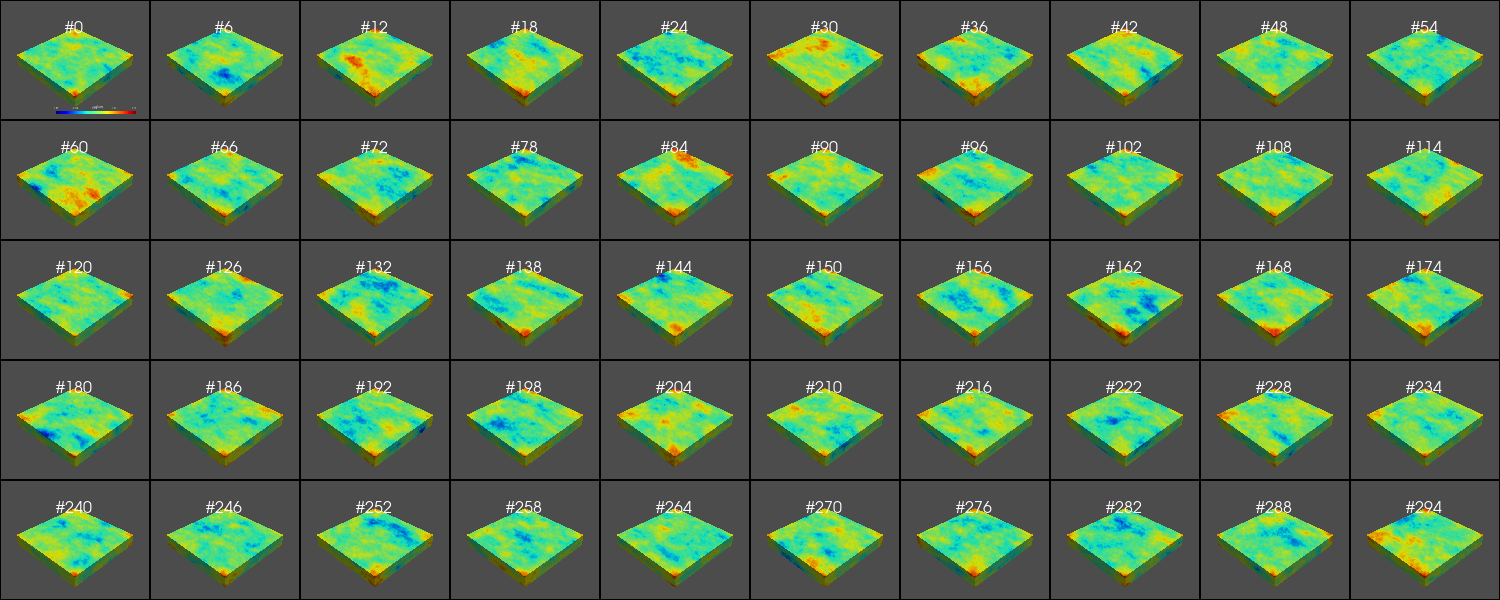

In [98]:
k=0
p = pv.Plotter(shape=(5, 10))
for i in range(5):
    for j in range(10):
        p.subplot(i,j)
        p.add_mesh(np.flip(np.log10(perm[k])), cmap='jet')
        p.add_title('#{}'.format(k), font_size=8)
        k += 6
p.show(jupyter_backend='static', window_size=(1500,600))

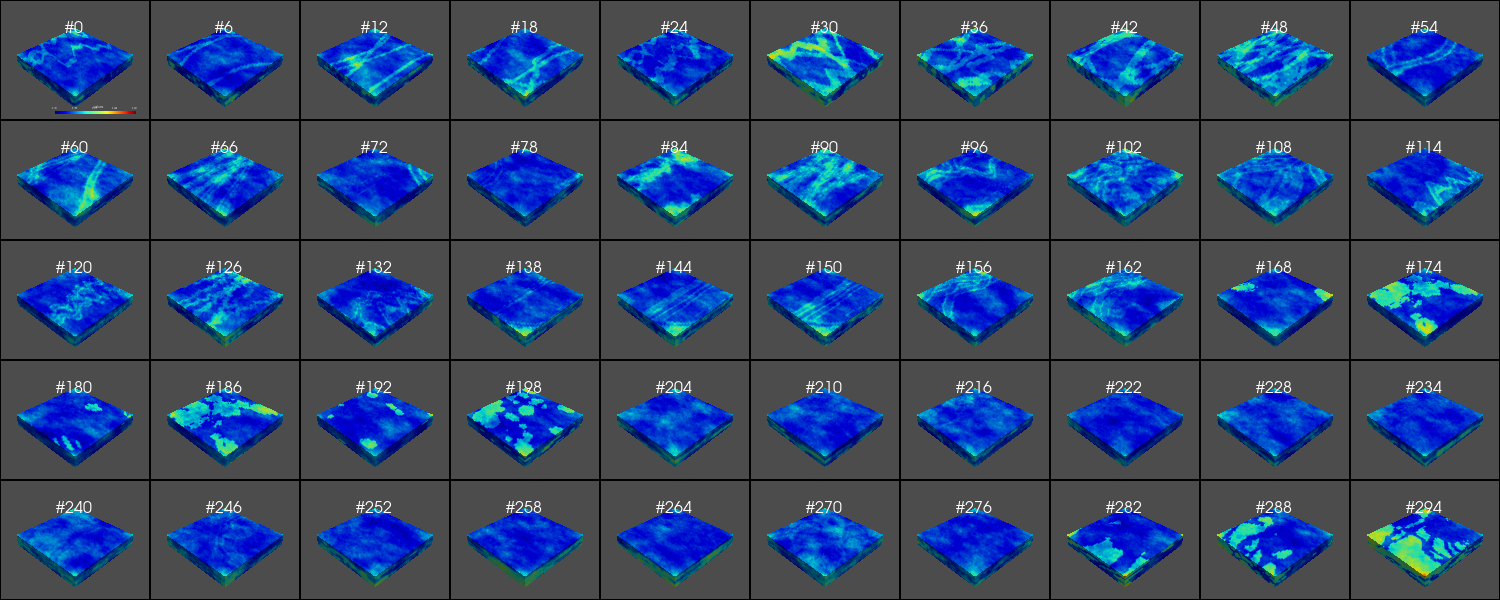

In [95]:
k=0
p = pv.Plotter(shape=(5, 10))
for i in range(5):
    for j in range(10):
        p.subplot(i,j)
        p.add_mesh(np.flip(poro[k]), cmap='jet')
        p.add_title('#{}'.format(k), font_size=8)
        k += 6
p.show(jupyter_backend='static', window_size=(1500,600))

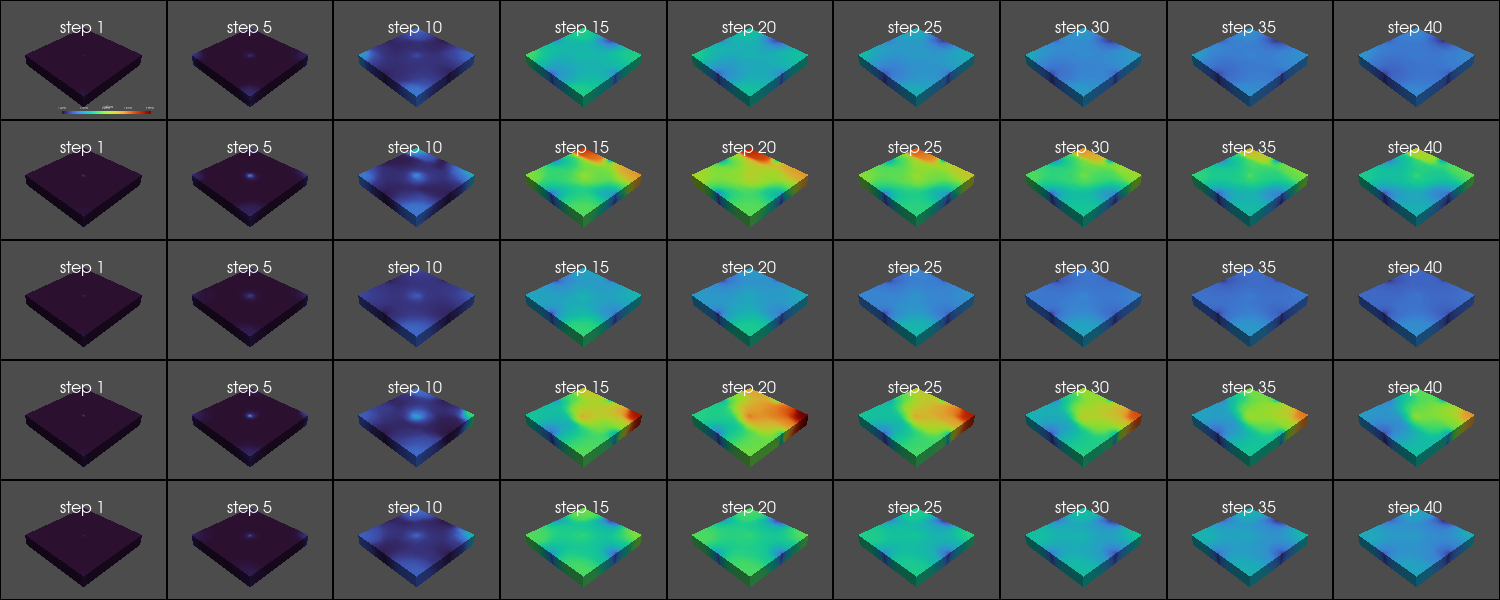

In [89]:
times = [0, 4, 9, 14, 19, 24, 29, 34, 39]

p = pv.Plotter(shape=(5,len(times)))
for i in range(5):
    for j in range(len(times)):
        p.subplot(i,j)
        p.add_mesh(np.flip(pres[i][times[j]]), cmap='turbo')
        p.add_title('step {}'.format(times[j]+1), font_size=8)
p.show(jupyter_backend='static', window_size=(1500,600))

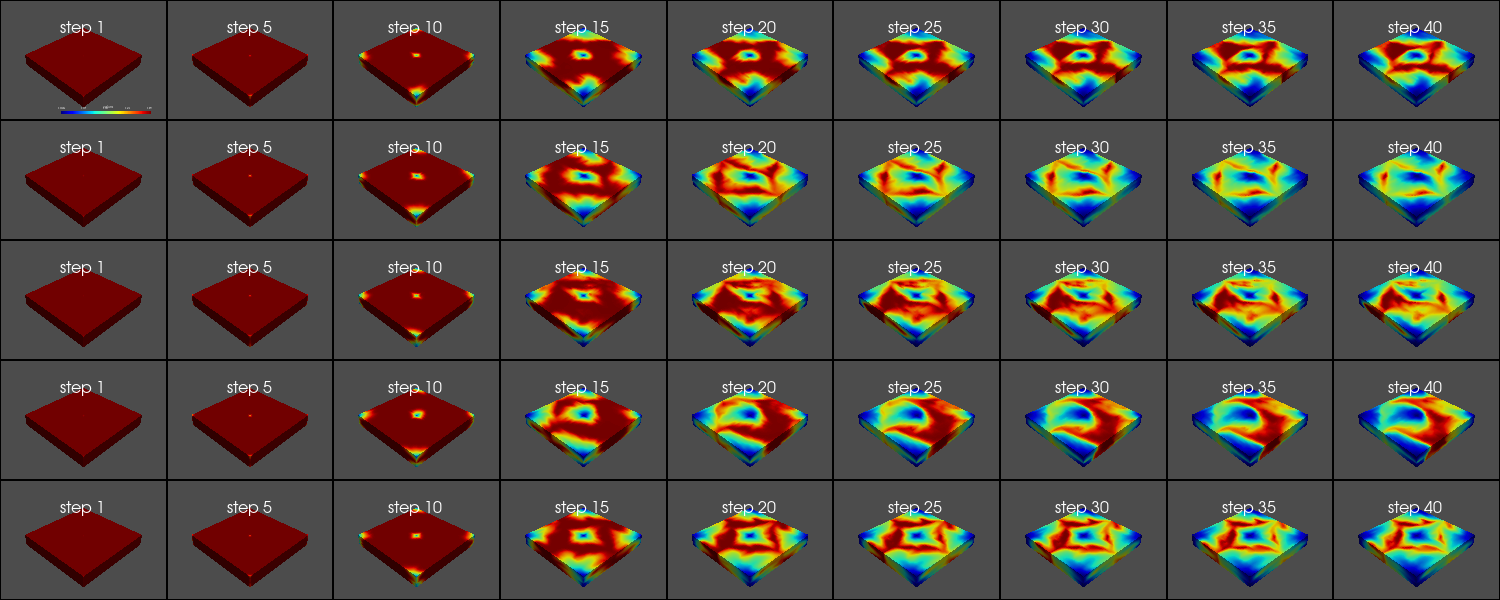

In [90]:
times = [0, 4, 9, 14, 19, 24, 29, 34, 39]

p = pv.Plotter(shape=(5,len(times)))
for i in range(5):
    for j in range(len(times)):
        p.subplot(i,j)
        p.add_mesh(np.flip(satu[i][times[j]]), cmap='jet')
        p.add_title('step {}'.format(times[j]+1), font_size=8)
p.show(jupyter_backend='static', window_size=(1500,600))

***
# Load (from scratch) all data and Visualize

In [ ]:
# ### Load individual datasets from simulations
timestamps, poro, perm, channels, pressure, saturation, well_opr, well_wpr, well_wcut = utils.load_arrays()

In [ ]:
utils.plot_static(poro, perm, channels)
utils.plot_data(timestamps, well_opr, well_wpr, well_wcut)
utils.plot_dynamic(poro, saturation, multiplier=10, cmaps=['viridis','jet'])

In [ ]:
utils.make_dynamic_animation(poro, [pressure,saturation])

***
# Data Processing
Load pre-existing data

Normalization, concatenate features and targets, train-test split

In [ ]:
### (a) To split and normalize data into (x,y,w):
# X_data, y_data, w_data = dataloader.split_xyw(poro, perm, channels, pressure, saturation, well_opr, well_wpr, well_wcut)

### (b) To load pre-computed, normalized (X,y,w,t):
X_data, y_data, w_data, timestamps = utils.load_xywt()

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test, w_train, w_test, randx, randy = utils.my_train_test_split(X_data, y_data, w_data, nobs=30)

In [ ]:
# Visualize X-samples
utils.plot_X_img_observation(X_data, randx, randy)
utils.plot_X_observation(X_train)
utils.plot_X_line_observation(X_train, timestamps)

***
# Build, Compile, Train, and Predict with AutoEncoder Models
Run Train/Test Predictions

In [ ]:
data_enc,    data_dec,    data_ae,    data_fit    = utils.make_data_ae(w_train)
static_enc,  static_dec,  static_ae,  static_fit  = utils.make_static_ae(y_train)
dynamic_enc, dynamic_dec, dynamic_ae, dynamic_fit = utils.make_dynamic_ae(X_train)
utils.plot_loss_all(data_fit, static_fit, dynamic_fit)

In [ ]:
w_train_pred, w_test_pred = utils.make_ae_prediction(w_train, w_test, data_ae)
utils.plot_data_results(timestamps, w_train, w_test, w_train_pred, w_test_pred, channel_select=2, multiplier=10)

In [ ]:
y_train_pred, y_test_pred = utils.make_ae_prediction(y_train, y_test, static_ae)
utils.plot_static_results(y_train, y_train_pred, multiplier=10, channel_select=0, cmaps=['viridis','gray_r'])
utils.plot_static_results(y_test, y_test_pred, multiplier=10, channel_select=0, cmaps=['viridis','gray_r'])

In [ ]:
X_train_pred, X_test_pred = utils.make_ae_prediction(X_train, X_test, dynamic_ae)
utils.plot_dynamic_results(X_train, X_train_pred, multiplier=10, channel_select=1)
utils.plot_dynamic_results(X_test, X_test_pred, multiplier=10, channel_select=1)

***
# Build, Compile, Train, and Predict with Latent-Inversion Network

In [ ]:
X_full, w_full, y_full = utils.make_full_traintest(X_train, X_test, w_train, w_test, y_train, y_test)

In [ ]:
reg, reg_fit = utils.make_inv_regressor(X_full, w_full, y_full, dynamic_enc, data_enc, static_dec)
utils.plot_loss(reg_fit, figsize=(4,3))

In [ ]:
inv_train, inv_test = utils.make_inv_prediction(reg, [X_train, X_test], [w_train, w_test], y_train, y_test)

In [ ]:
utils.plot_inversion_result(y_train, inv_train, multiplier=10, channel_select=0, cmaps=['viridis','gray_r'])

In [ ]:
utils.plot_inversion_result(y_test, inv_test, multiplier=10, channel_select=0, cmaps=['viridis','gray_r'])

***
# Back-Normalize inversion results to original domain and visualize

In [ ]:
poro_hat, perm_hat, channels_hat = utils.make_inv_backnorm([inv_train, inv_test], [poro, perm, channels])
utils.plot_static(poro_hat, perm_hat, channels_hat, multiplier=10)

***
# END